IMPORTS

In [10]:
import tensorflow as tf 
from tensorflow.keras import models, layers 
import matplotlib.pyplot as plt

CONSTANTS


In [11]:
IMG_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

tensorflow --> tfdata -->https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

In [12]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    # labels='inferred',
    # label_mode='int',
    # class_names=None,
    # color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    # interpolation='bilinear',
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # pad_to_aspect_ratio=False,
    # data_format=None,
    # verbose=True
)

Found 2152 files belonging to 3 classes.


In [39]:
class_name = dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [23]:
len(dataset)

68

In [25]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0])                            # this is a tensor

tf.Tensor(
[[[191. 177. 174.]
  [198. 184. 181.]
  [206. 192. 189.]
  ...
  [156. 142. 142.]
  [159. 145. 145.]
  [167. 153. 153.]]

 [[193. 179. 176.]
  [198. 184. 181.]
  [205. 191. 188.]
  ...
  [150. 136. 136.]
  [152. 138. 138.]
  [159. 145. 145.]]

 [[195. 181. 178.]
  [199. 185. 182.]
  [204. 190. 187.]
  ...
  [150. 136. 136.]
  [152. 138. 138.]
  [157. 143. 143.]]

 ...

 [[159. 131. 128.]
  [149. 121. 118.]
  [158. 130. 127.]
  ...
  [152. 126. 127.]
  [141. 115. 116.]
  [144. 118. 119.]]

 [[142. 114. 111.]
  [151. 123. 120.]
  [166. 138. 135.]
  ...
  [156. 130. 131.]
  [145. 119. 120.]
  [148. 122. 123.]]

 [[142. 114. 111.]
  [151. 123. 120.]
  [151. 123. 120.]
  ...
  [150. 124. 125.]
  [142. 116. 117.]
  [148. 122. 123.]]], shape=(256, 256, 3), dtype=float32)


In [26]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())                    # converted to numpy arr    range(0-256)
    # print(label_batch.numpy())

[[[209. 197. 197.]
  [196. 184. 184.]
  [180. 168. 168.]
  ...
  [158. 146. 150.]
  [158. 146. 150.]
  [164. 152. 156.]]

 [[185. 173. 173.]
  [177. 165. 165.]
  [178. 166. 166.]
  ...
  [159. 147. 151.]
  [160. 148. 152.]
  [165. 153. 157.]]

 [[198. 186. 186.]
  [181. 169. 169.]
  [183. 171. 171.]
  ...
  [164. 152. 156.]
  [164. 152. 156.]
  [167. 155. 159.]]

 ...

 [[125.  99. 100.]
  [132. 106. 107.]
  [117.  91.  92.]
  ...
  [123.  97. 100.]
  [140. 114. 117.]
  [147. 121. 124.]]

 [[171. 145. 146.]
  [124.  98.  99.]
  [108.  82.  83.]
  ...
  [127. 101. 104.]
  [133. 107. 110.]
  [124.  98. 101.]]

 [[175. 149. 150.]
  [120.  94.  95.]
  [123.  97.  98.]
  ...
  [113.  87.  90.]
  [133. 107. 110.]
  [143. 117. 120.]]]


In [27]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)                    # ( batch_Size , img_size , img_size , channels )
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 2 1 0 2 0 1 2 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1]


Image shape: (256, 256, 3)


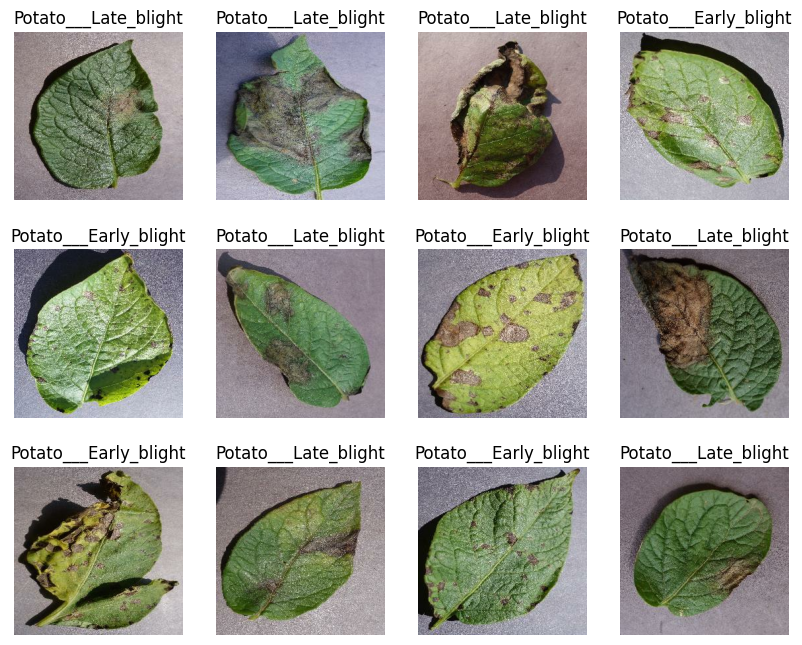

In [40]:
for image_batch, label_batch in dataset.take(1):
    plt.figure(figsize=(10, 8))  # Set figure size

    for i in range(12):  
        ax = plt.subplot(3, 4, i + 1)  # Corrected variable name
        plt.imshow(image_batch[i].numpy().astype("uint8"))  # Convert float to uint8 
        plt.title(class_name[label_batch[i].numpy()])  # Convert tensor to numpy before indexing
        plt.axis("off")  # Hide axes

    print("Image shape:", image_batch[0].shape)  # Print only once outside the loop

plt.show()  # Display the images

80% ==> TRAIN
20% ==> 10% => VAL ,10% => TEST

In [43]:
len(dataset)

68

In [13]:
train_size = 0.8
len(dataset)*train_size
# dataset.take()

54.400000000000006

In [14]:
train_ds = dataset.take(54)
len(train_ds)

54

In [15]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [16]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [17]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [18]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [78]:
def get_dataset_partitions_tf(ds , train_split = 0.8 , val_split = 0.1 , test_split = 0.1 , shuffle=True ,shuffle_size = 10000 ):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size , seed = 12)
        
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size) 
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds , val_ds , test_ds

In [79]:
train_ds , val_ds , test_ds = get_dataset_partitions_tf(dataset)

In [80]:
len(train_ds)

54

In [81]:
len(val_ds)


6

In [82]:
len(test_ds)

8

In [83]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [25]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMG_SIZE, IMG_SIZE),  # Corrected import
    layers.Rescaling(1.0 / 255)           # Corrected import
])

In [26]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),  # Fixed typo
    layers.RandomRotation(0.2),                    # Added missing comma
])

In [27]:
INPUT_SHAPE = (BATCH_SIZE , IMG_SIZE,IMG_SIZE,CHANNELS)
n_classes = 3
# Build CNN model
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=INPUT_SHAPE),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),  # Use Dense instead of Conv2D
    layers.Dense(n_classes, activation="softmax")  # Fixed activation function
])
model.build(input_shape = INPUT_SHAPE )


C:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# Print model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

 Total params: 183,747 (717.76 KB)
 Trainable params: 183,747 (717.76 KB)                 ---> these are weights

In [29]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [30]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size = BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.4872 - loss: 0.9318 - val_accuracy: 0.6198 - val_loss: 0.8086
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.6803 - loss: 0.7128 - val_accuracy: 0.6979 - val_loss: 0.6505
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.7554 - loss: 0.5656 - val_accuracy: 0.8698 - val_loss: 0.4063
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.7566 - loss: 0.5435 - val_accuracy: 0.8906 - val_loss: 0.2756
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.8749 - loss: 0.3059 - val_accuracy: 0.8854 - val_loss: 0.2818
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.9547 - loss: 0.1387 - val_accuracy: 0.9479 - val_loss: 0.1575
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.9509 - loss: 0.1692 - val_accuracy: 0.8958 - val_loss: 0.2782
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.9629 - loss: 0.0933 - val_accuracy: 0.9323 - val_loss:

In [31]:
accurracy = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 330ms/step - accuracy: 0.9927 - loss: 0.0249


In [33]:
model.save("model.h5")
print("Full model saved successfully!")


Full model saved successfully!


In [34]:
model.save("model.keras")
print("Full model saved successfully!")


Full model saved successfully!


In [35]:
accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {accuracy[1] * 100:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step - accuracy: 0.9882 - loss: 0.0335
Test Accuracy: 99.22%


In [39]:
dataset_path = "PlantVillage"

# Check available subdirectories (class names)
print("Classes:", os.listdir(dataset_path))

# Check images inside each class folder
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):  # Ensure it's a directory
        images = os.listdir(class_path)
        print(f"{class_name}: {len(images)} images")
        print("Sample files:", images[:2])  # Show first 5 images

Classes: ['Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight']
Potato___Early_blight: 1000 images
Sample files: ['001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG', '002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG']
Potato___healthy: 152 images
Sample files: ['00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL 1864.JPG', '03da9931-e514-4cc7-b04a-8f474a133ce5___RS_HL 1830.JPG']
Potato___Late_blight: 1000 images
Sample files: ['0051e5e8-d1c4-4a84-bf3a-a426cdad6285___RS_LB 4640.JPG', '00695906-210d-4a9d-822e-986a17384115___RS_LB 4026.JPG']


In [45]:
history

In [46]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [47]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [49]:
history.history['accuracy']

[0.5098379850387573,
 0.6892361044883728,
 0.7893518805503845,
 0.8055555820465088,
 0.8964120149612427,
 0.9496527910232544,
 0.9508101940155029,
 0.9525462985038757,
 0.9583333134651184,
 0.9774305820465088,
 0.9774305820465088,
 0.9803240895271301,
 0.9803240895271301,
 0.9716435074806213,
 0.9849537014961243,
 0.9826388955116272,
 0.9872685074806213,
 0.9930555820465088,
 0.9907407164573669,
 0.9814814925193787,
 0.9884259104728699,
 0.9704861044883728,
 0.9895833134651184,
 0.9924768805503845,
 0.9895833134651184,
 0.9907407164573669,
 0.9618055820465088,
 0.9837962985038757,
 0.9913194179534912,
 0.9826388955116272,
 0.9907407164573669,
 0.9947916865348816,
 0.9959490895271301,
 0.9947916865348816,
 0.9606481194496155,
 0.9890046119689941,
 0.9849537014961243,
 0.9971064925193787,
 0.9930555820465088,
 0.9959490895271301,
 0.9901620149612427,
 0.9942129850387573,
 0.9930555820465088,
 0.9965277910232544,
 0.9809027910232544,
 0.9930555820465088,
 0.9895833134651184,
 0.9930555820

In [51]:
len(history.history['loss'])

50

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

PLOT CHART FROM HISTORY

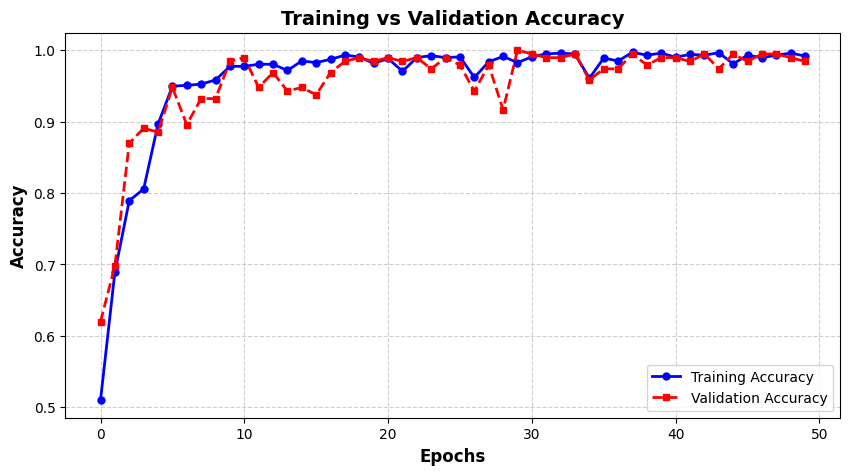

In [57]:
# plt.figure(figsize=(8,8))
# plt.subplot(1,2,1)
# plt.plot(range(EPOCHS),acc, label = 'Training Accurracy' )
# plt.plot(range(EPOCHS),val_acc, label = 'Validation Accurracy' )
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accurracy')

plt.figure(figsize=(10, 5))  # Wider figure for better visibility

# Improved Accuracy Plot
plt.plot(range(EPOCHS), acc, label='Training Accuracy', color='blue', linestyle='-', linewidth=2, marker='o', markersize=5)
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy', color='red', linestyle='--', linewidth=2, marker='s', markersize=5)

# Labels, Title, and Grid
plt.xlabel("Epochs", fontsize=12, fontweight='bold')
plt.ylabel("Accuracy", fontsize=12, fontweight='bold')
plt.title("Training vs Validation Accuracy", fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

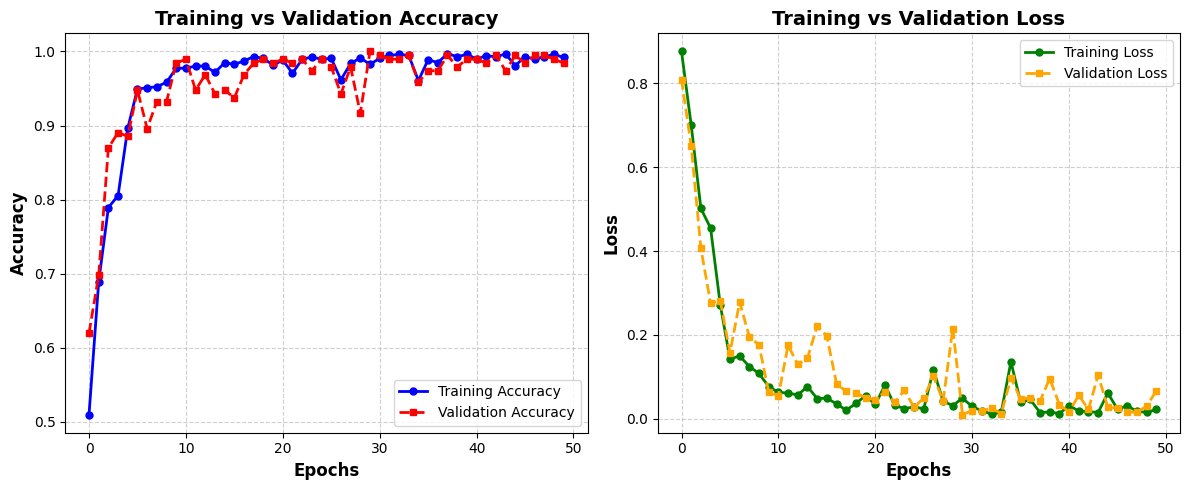

In [59]:
# Assuming acc, val_acc, loss, val_loss, and EPOCHS are already defined

plt.figure(figsize=(12, 5))  # Wider figure for better readability

# 📈 Accuracy Plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(range(EPOCHS), acc, label='Training Accuracy', color='blue', linestyle='-', linewidth=2, marker='o', markersize=5)
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy', color='red', linestyle='--', linewidth=2, marker='s', markersize=5)
plt.xlabel("Epochs", fontsize=12, fontweight='bold')
plt.ylabel("Accuracy", fontsize=12, fontweight='bold')
plt.title("Training vs Validation Accuracy", fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# 📉 Loss Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(range(EPOCHS), loss, label='Training Loss', color='green', linestyle='-', linewidth=2, marker='o', markersize=5)
plt.plot(range(EPOCHS), val_loss, label='Validation Loss', color='orange', linestyle='--', linewidth=2, marker='s', markersize=5)
plt.xlabel("Epochs", fontsize=12, fontweight='bold')
plt.ylabel("Loss", fontsize=12, fontweight='bold')
plt.title("Training vs Validation Loss", fontsize=14, fontweight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

[[[152 137 144]
  [161 146 153]
  [169 154 161]
  ...
  [168 155 162]
  [184 171 178]
  [155 142 149]]

 [[117 102 109]
  [129 114 121]
  [143 128 135]
  ...
  [156 143 150]
  [167 154 161]
  [176 163 170]]

 [[151 136 143]
  [156 141 148]
  [159 144 151]
  ...
  [178 165 172]
  [156 143 150]
  [166 153 160]]

 ...

 [[137 117 126]
  [127 107 116]
  [136 116 125]
  ...
  [149 134 141]
  [147 132 139]
  [152 137 144]]

 [[159 139 148]
  [134 114 123]
  [143 123 132]
  ...
  [137 122 129]
  [141 126 133]
  [148 133 140]]

 [[186 166 175]
  [159 139 148]
  [157 137 146]
  ...
  [140 125 132]
  [143 128 135]
  [147 132 139]]]


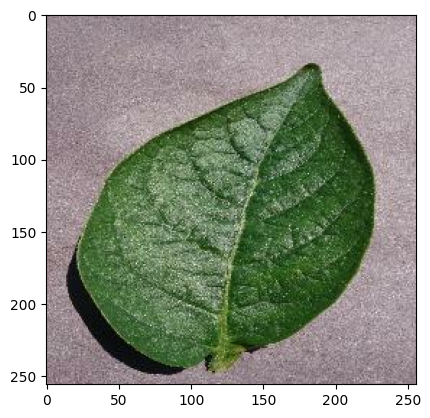

In [62]:
for image_batch, label_batch in dataset.take(1):        # note it is in tensor
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    print(image_batch[0].numpy().astype('uint8'))
    

first image to pridict
actual label : o
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1
pridicted label: o
[8.4064528e-03 9.9159360e-01 5.4357564e-12]


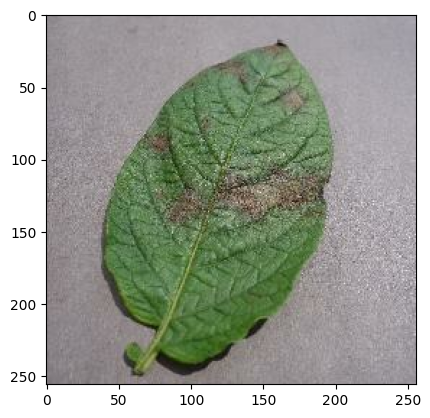

In [68]:
import numpy as np
for image_batch, label_batch in dataset.take(1):        # note it is in tensor
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0]

    print("first image to pridict")
    plt.imshow(first_image)
    print("actual label :" , class_name[first_label])

    batch_pridiction = model.predict(image_batch)
    print(np.argmax(batch_pridiction[0]))
    
    print("pridicted label:" , class_name[np.argmax(batch_pridiction[0])])
    print(batch_pridiction[0])


In [88]:

class_names = dataset.class_names

def predict(model, img, class_names):
    """Predict the class and confidence of an image using a trained model."""
    img_arr = tf.keras.preprocessing.image.img_to_array(img)  # Convert to NumPy array
    img_arr = tf.expand_dims(img_arr, 0)  # Expand dimensions to match model input shape
    
    predictions = model.predict(img_arr)  # Get predictions
    predicted_class = class_names[np.argmax(predictions[0])]  # Get predicted class
    confidence = round(100 * np.max(predictions[0]), 2)  # Get confidence percentage
    
    return predicted_class, confidence   

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


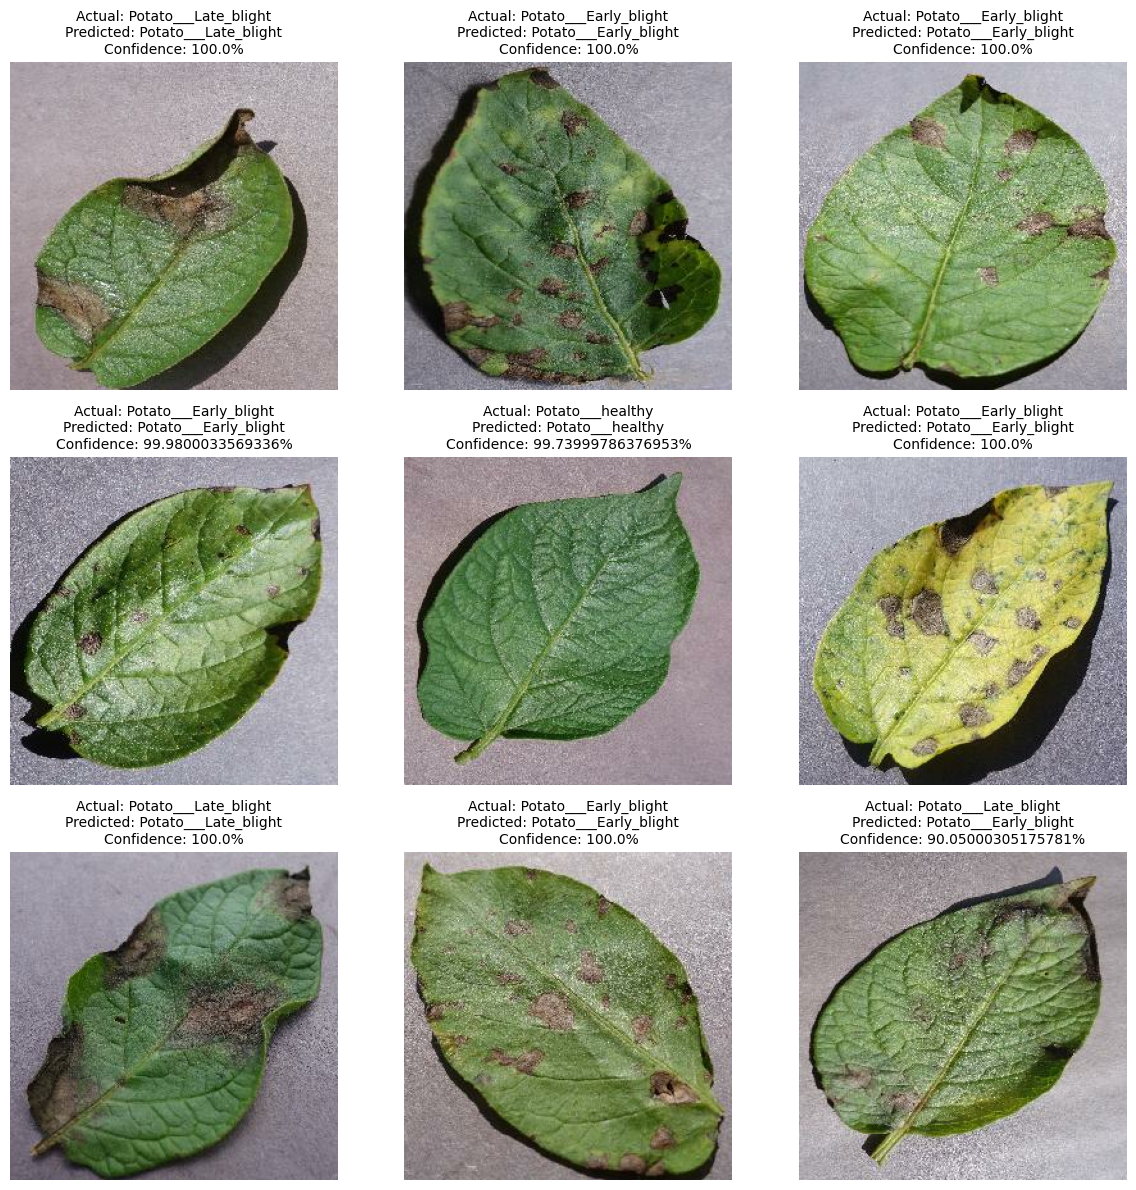

In [90]:
# Plot predictions for 9 images from the test dataset
plt.figure(figsize=(12, 12))

for images, labels in test_ds.take(1):  # Take one batch from the test dataset
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  # Show image

        # Predict class and confidence
        predicted_class, confidence = predict(model, images[i], class_names)
        actual_class = class_names[labels[i].numpy()]  # Get actual class

        # Set title
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}%", fontsize=10)
        plt.axis("off")

plt.tight_layout()  # Adjust subplot spacing
plt.show()


In [94]:
model_version = 1
model.save(f"../models/Potato_Diseases_pridictor_version_{model_version}.keras")  # Use .keras (recommended)
